In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')


from src.data_preprocessing.load_data import load_data
from src.data_preprocessing.clean_data import datetime_conversion, drop_na
from src.data_preprocessing.features_engineering import log_return, volatility, range_of_motion, target_volatility, lag_features, rolling_stat, log_transform
from src.data_preprocessing.split_data import split_data, split_features


In [2]:
df = load_data('../data/raw/bitcoin_2010-07-17_2024-06-28.csv')
df.head()

Data loaded successfully from ../data/raw/bitcoin_2010-07-17_2024-06-28.csv


,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12


In [3]:
datetime_conversion(df, 'Start')
datetime_conversion(df, 'End')

DateTime conversion successful for column 'Start'.
DateTime conversion successful for column 'End'.


In [4]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12


In [5]:
print("data shape",df.shape)
print("data info", df.info())

data shape (5095, 8)
<class 'pandas.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       5095 non-null   datetime64[us]
 1   End         5095 non-null   datetime64[us]
 2   Open        5095 non-null   float64       
 3   High        5095 non-null   float64       
 4   Low         5095 non-null   float64       
 5   Close       5095 non-null   float64       
 6   Volume      5095 non-null   float64       
 7   Market Cap  5095 non-null   float64       
dtypes: datetime64[us](2), float64(6)
memory usage: 318.6 KB
data info None


In [6]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,5095,5095,5095.000000,5095.000000,5095.000000,5095.000000,5.095000e+03,5.095000e+03
mean,2017-07-07 00:00:00,2017-07-08 00:00:00,11831.709218,12102.805318,11547.069465,11844.945596,2.135086e+10,2.229693e+11
min,2010-07-17 00:00:00,2010-07-18 00:00:00,0.050000,0.050000,0.050000,0.050000,0.000000e+00,0.000000e+00
25%,2014-01-10 12:00:00,2014-01-11 12:00:00,230.301000,234.604500,226.953000,230.385500,8.455034e+06,3.295801e+09
50%,2017-07-07 00:00:00,2017-07-08 00:00:00,2608.560000,2757.940000,2538.550000,2610.600000,1.224709e+09,4.296678e+10
75%,2020-12-31 12:00:00,2021-01-01 12:00:00,17113.088459,17444.750278,16833.803874,17098.057468,3.429250e+10,3.253326e+11
max,2024-06-27 00:00:00,2024-06-28 00:00:00,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12
std,NaN,NaN,17422.697478,17813.944837,17006.738229,17438.748935,3.373560e+10,3.352850e+11


In [7]:
df.isnull().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
log_return(df)
range_of_motion(df)
volatility(df)
target_volatility(df)
lag_features(df)
rolling_stat(df)
log_transform(df, 'Volume')
log_transform(df, 'Market Cap')


df.head()

Log return calculation successful.
Range of motion calculation successful.
Volatility calculation successful.
Target_Volatility features created successfully
Lag features created successfully
log transformation on Volume done successfully
log transformation on Market Cap done successfully


,Start,End,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility,Target_Volatility,Volatility_lag_1,Log_Return_lag_1,Volatility_roll_mean_5,Volatility_roll_std_5,log_Volume,log_Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12,NaN,1672.24,NaN,NaN,NaN,NaN,NaN,NaN,25.523910,27.820312
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12,-0.014457,1596.34,NaN,NaN,NaN,NaN,NaN,NaN,25.345860,27.822091
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12,0.016789,1958.58,NaN,NaN,NaN,-0.014457,NaN,NaN,25.377524,27.820330
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12,-0.023037,4369.77,NaN,NaN,NaN,0.016789,NaN,NaN,25.203820,27.822551
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12,0.047030,1230.60,NaN,NaN,NaN,-0.023037,NaN,NaN,24.950675,27.866352


In [10]:
df.isna().sum()

Start                      0
End                        0
Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Market Cap                 0
Log_Return                 1
Range_of_Motion            0
Volatility                30
Target_Volatility         30
Volatility_lag_1          31
Log_Return_lag_1           2
Volatility_roll_mean_5    34
Volatility_roll_std_5     34
log_Volume                 0
log_Market Cap             0
dtype: int64

In [11]:
df = drop_na(df)

Dropped 35 rows with missing values.


In [12]:
df.shape

(5060, 18)

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Start                   5060 non-null   datetime64[us]
 1   End                     5060 non-null   datetime64[us]
 2   Open                    5060 non-null   float64       
 3   High                    5060 non-null   float64       
 4   Low                     5060 non-null   float64       
 5   Close                   5060 non-null   float64       
 6   Volume                  5060 non-null   float64       
 7   Market Cap              5060 non-null   float64       
 8   Log_Return              5060 non-null   float64       
 9   Range_of_Motion         5060 non-null   float64       
 10  Volatility              5060 non-null   float64       
 11  Target_Volatility       5060 non-null   float64       
 12  Volatility_lag_1        5060 non-null   float64       
 13 

In [14]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility,Target_Volatility,Volatility_lag_1,Log_Return_lag_1,Volatility_roll_mean_5,Volatility_roll_std_5,log_Volume,log_Market Cap
count,5060,5060,5060.000000,5060.000000,5060.000000,5060.000000,5.060000e+03,5.060000e+03,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000
mean,2017-06-20 12:00:00,2017-06-21 12:00:00,11463.020450,11730.463720,11182.570141,11477.675375,2.084959e+10,2.156441e+11,-0.002688,547.893579,0.222740,0.222894,0.222627,-0.002698,0.222517,0.010431,16.387858,19.931441
min,2010-07-18 00:00:00,2010-07-19 00:00:00,0.050500,0.050500,0.050500,0.050500,0.000000e+00,0.000000e+00,-0.424580,0.000000,0.039128,0.039128,0.039128,-0.424580,0.041392,0.000070,0.000000,0.000000
25%,2014-01-02 18:00:00,2014-01-03 18:00:00,229.761250,233.080000,226.240250,229.767750,6.992449e+06,3.276266e+09,-0.018947,4.354000,0.134658,0.134690,0.134629,-0.018947,0.134965,0.002449,15.760147,21.909970
50%,2017-06-20 12:00:00,2017-06-21 12:00:00,2513.580000,2587.360000,2421.400000,2520.165000,1.041762e+09,4.151413e+10,-0.001620,78.233500,0.182782,0.182807,0.182767,-0.001620,0.182924,0.005390,20.764179,24.449300
75%,2020-12-06 06:00:00,2020-12-07 06:00:00,16779.200271,16997.326371,16490.540608,16781.820832,3.346520e+10,3.199418e+11,0.013279,591.970000,0.261965,0.262035,0.261873,0.013256,0.262219,0.011975,24.233772,26.491405
max,2024-05-24 00:00:00,2024-05-25 00:00:00,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12,0.518084,11999.886416,0.897643,0.897643,0.897643,0.518084,0.882038,0.211336,26.080567,27.987641
std,NaN,NaN,16880.359683,17274.571471,16461.803641,16901.532419,3.326831e+10,3.240788e+11,0.049394,1035.668028,0.143347,0.143603,0.143233,0.049386,0.142070,0.016296,9.819838,10.157709


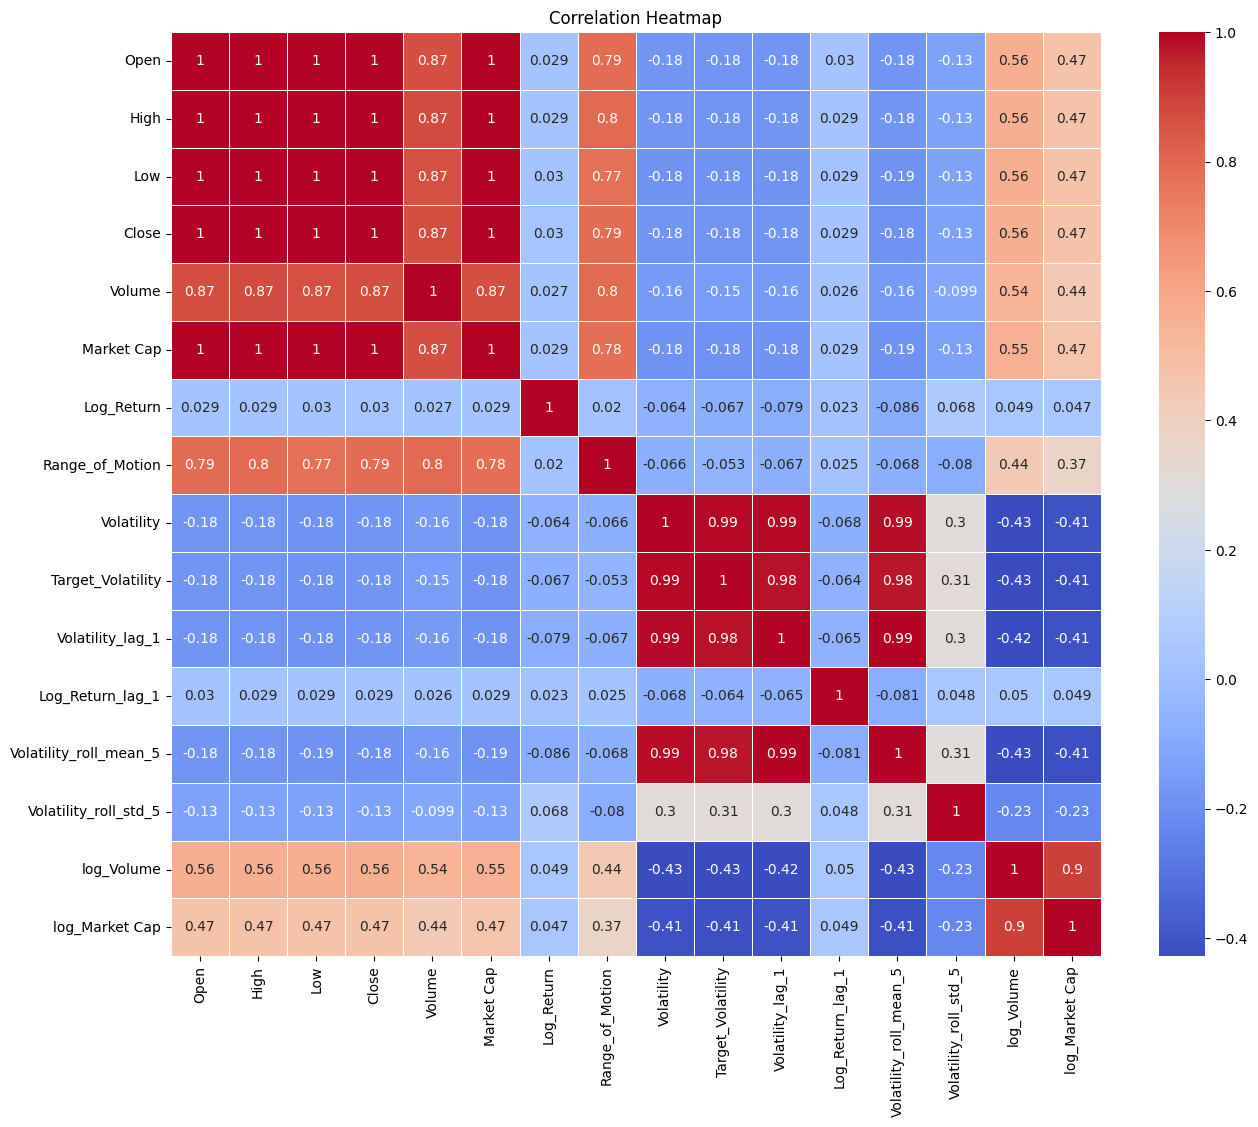

In [15]:
num_col = df.select_dtypes(include='number').columns


# Compute the correlation matrix for numerical columns
correlation_matrix = df[num_col].corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

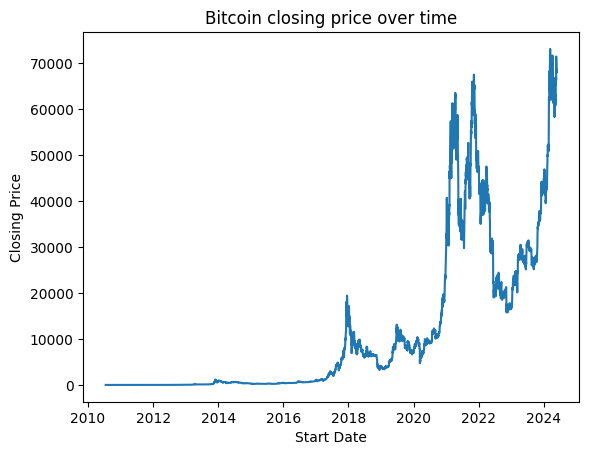

In [16]:

plt.figure()
plt.plot(df['Start'], df['Close'])
plt.title("Bitcoin closing price over time")
plt.xlabel('Start Date')
plt.ylabel('Closing Price')
plt.show()

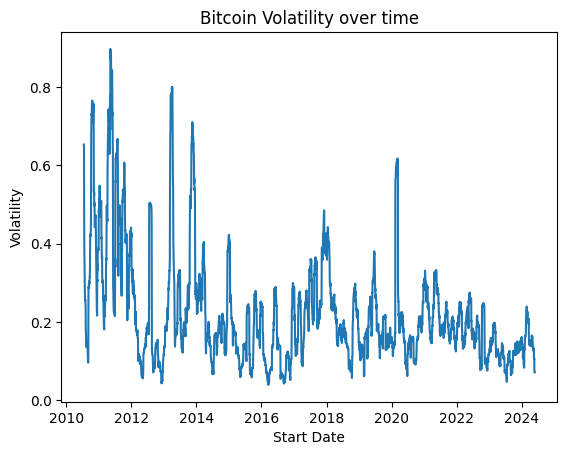

In [17]:
plt.figure()
plt.plot(df['Start'], df['Volatility'])
plt.title("Bitcoin Volatility over time")
plt.xlabel('Start Date')
plt.ylabel('Volatility')
plt.show()

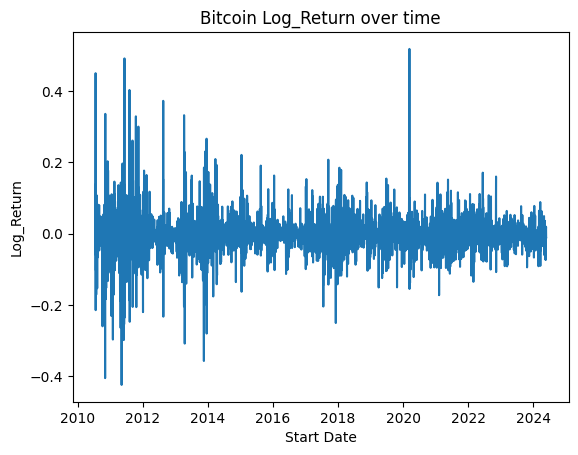

In [18]:
plt.figure()
plt.plot(df['Start'], df['Log_Return'])
plt.title("Bitcoin Log_Return over time")
plt.xlabel('Start Date')
plt.ylabel('Log_Return')
plt.show()

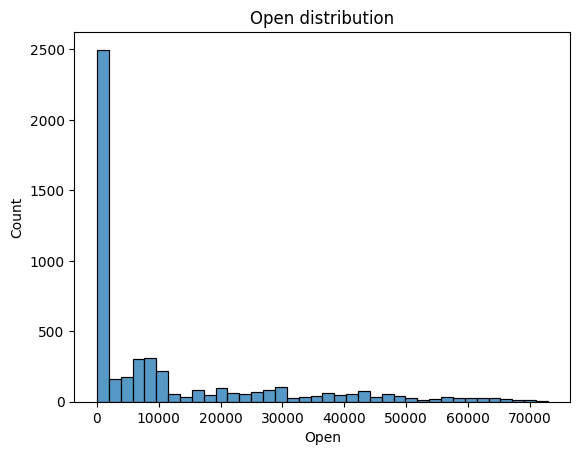

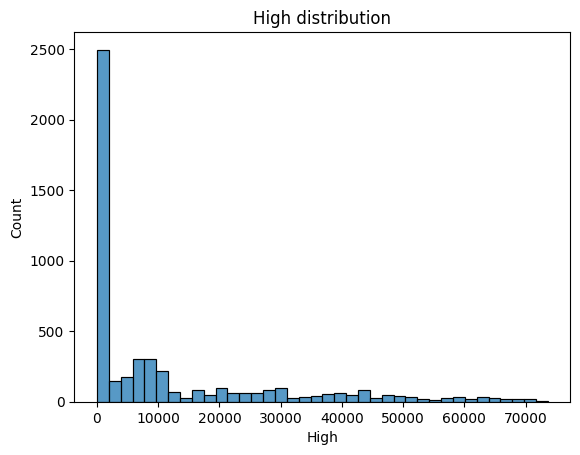

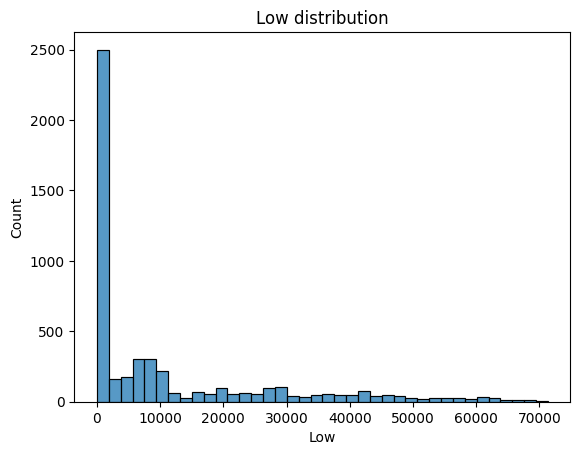

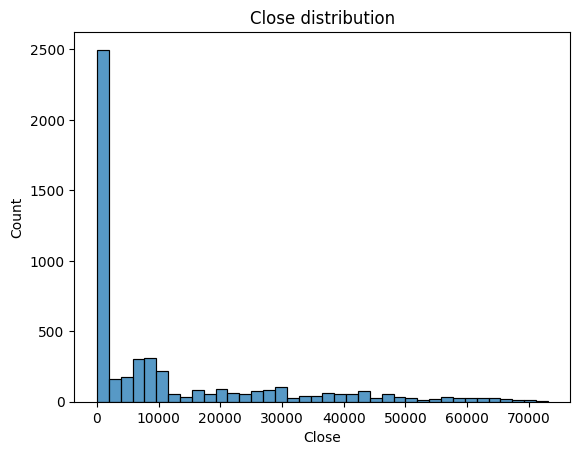

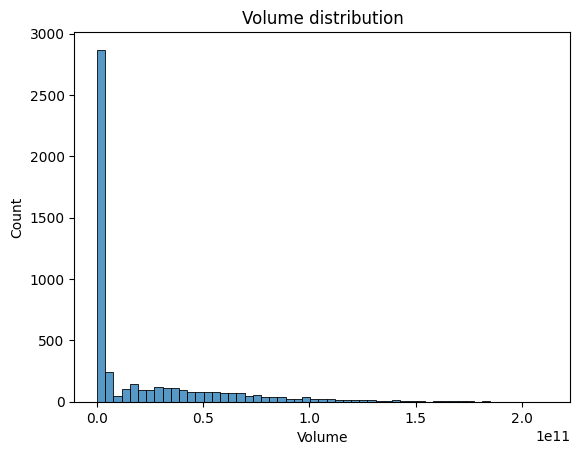

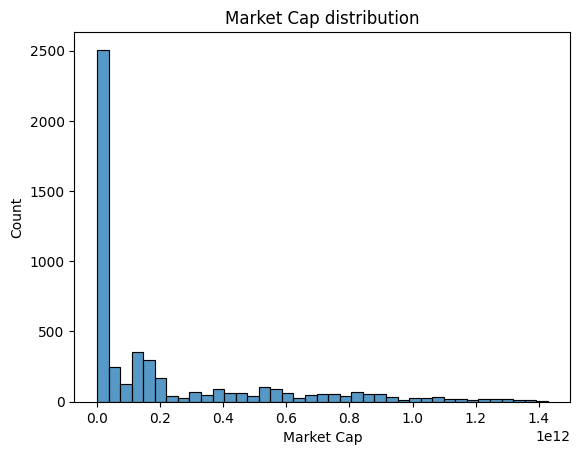

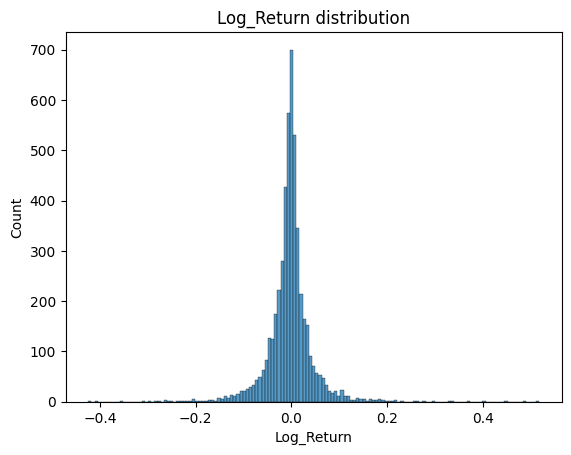

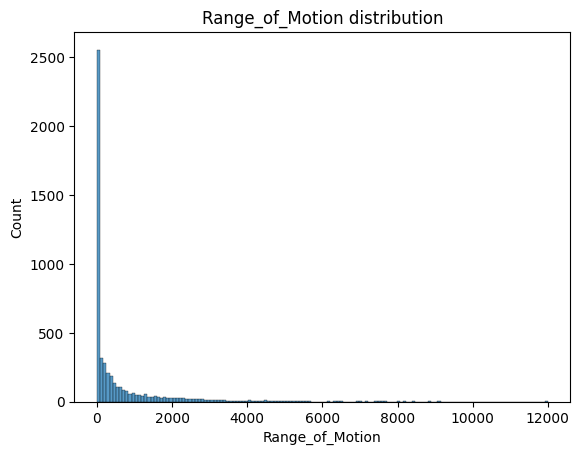

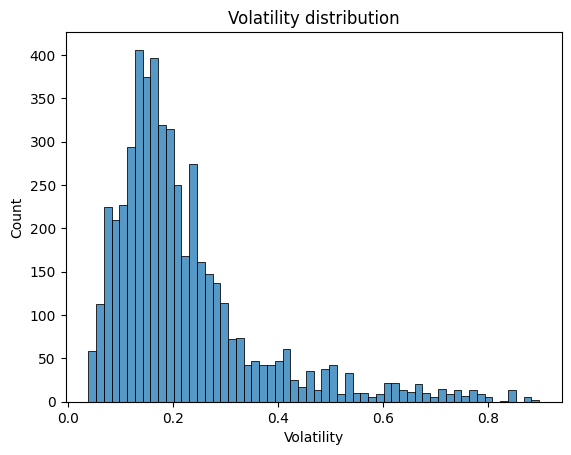

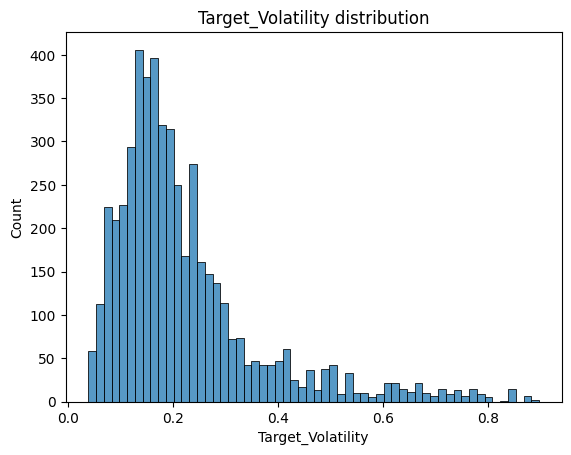

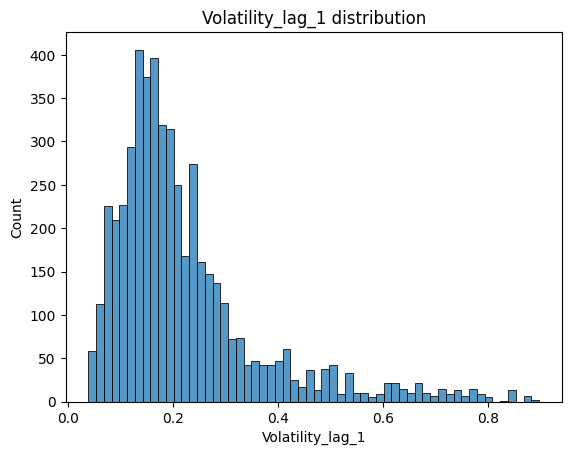

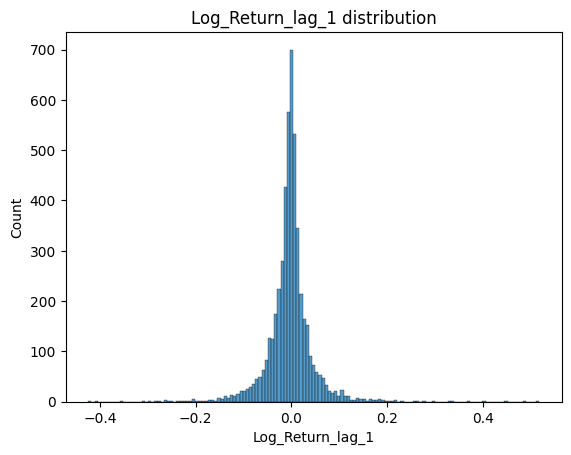

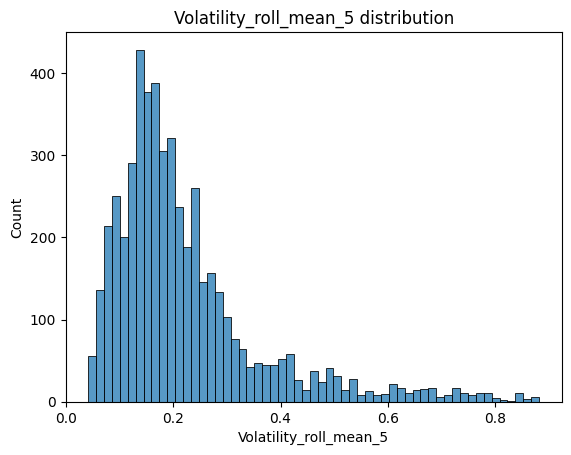

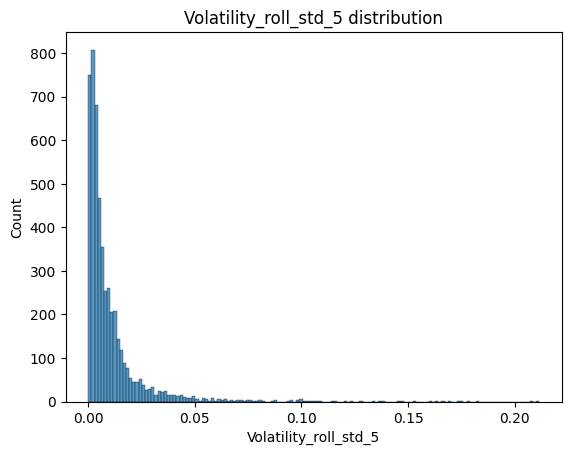

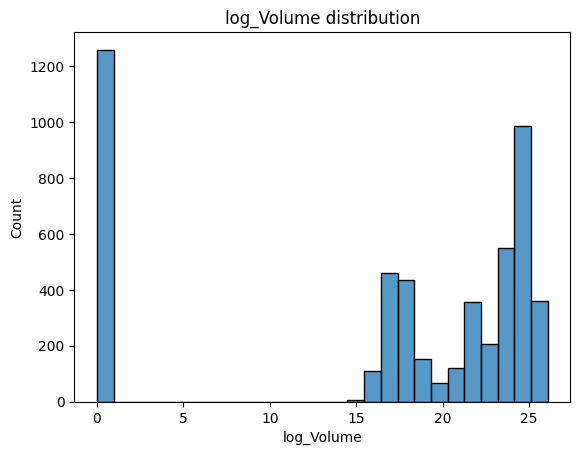

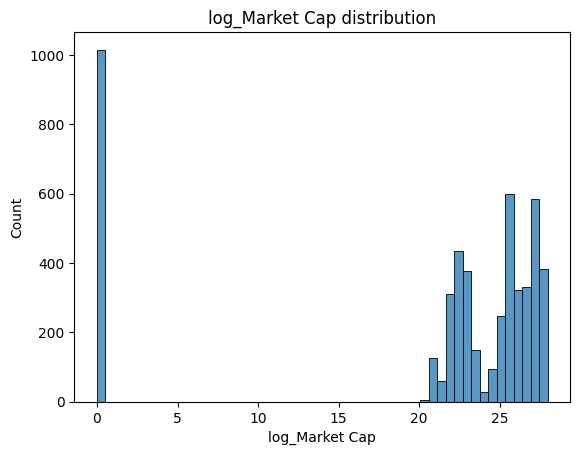

In [19]:
num_col = df.select_dtypes(include='number').columns.tolist()

for num in num_col:
  plt.figure()
  sns.histplot(data=df, x=num,)
  plt.title(f"{num} distribution")
  plt.show()



In [20]:
train_df, val_df, test_df = split_data(df)

Data splitted successfully!


In [21]:
train_df.drop(columns=['Start', 'End'])
val_df.drop(columns=['Start', 'End'])
test_df.drop(columns=['Start', 'End'])

,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility,Target_Volatility,Volatility_lag_1,Log_Return_lag_1,Volatility_roll_mean_5,Volatility_roll_std_5,log_Volume,log_Market Cap
4048,154.2000,154.2000,154.2000,154.2000,0.0,0.0,0.084468,0.0,0.325159,0.329729,0.314642,0.034532,0.312605,0.008420,0.0,0.0
4049,143.4750,143.4750,143.4750,143.4750,0.0,0.0,-0.072090,0.0,0.329729,0.351160,0.325159,0.084468,0.317924,0.009296,0.0,0.0
4050,127.4000,127.4000,127.4000,127.4000,0.0,0.0,-0.118829,0.0,0.351160,0.357517,0.329729,-0.072090,0.326764,0.015325,0.0,0.0
4051,119.2000,119.2000,119.2000,119.2000,0.0,0.0,-0.066529,0.0,0.357517,0.362653,0.351160,-0.118829,0.335641,0.018064,0.0,0.0
4052,126.6155,126.6155,126.6155,126.6155,0.0,0.0,0.060352,0.0,0.362653,0.368914,0.357517,-0.066529,0.345243,0.016829,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,0.0505,0.0505,0.0505,0.0505,0.0,0.0,-0.214792,0.0,0.452086,0.644216,0.398973,0.138565,0.387044,0.040678,0.0,0.0
5056,0.0792,0.0792,0.0792,0.0792,0.0,0.0,0.450003,0.0,0.644216,0.647313,0.452086,-0.214792,0.446054,0.116094,0.0,0.0
5057,0.0747,0.0747,0.0747,0.0747,0.0,0.0,-0.058496,0.0,0.647313,0.651475,0.644216,0.450003,0.502990,0.133462,0.0,0.0
5058,0.0808,0.0808,0.0808,0.0808,0.0,0.0,0.078497,0.0,0.651475,0.653358,0.647313,-0.058496,0.558813,0.123138,0.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

train_df[num_col] = scale.fit_transform(train_df[num_col])
val_df[num_col] = scale.transform(val_df[num_col])

train_df

,Start,End,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility,Target_Volatility,Volatility_lag_1,Log_Return_lag_1,Volatility_roll_mean_5,Volatility_roll_std_5,log_Volume,log_Market Cap
0,2024-05-24,2024-05-25,2.674752,2.662551,2.706741,2.708781,2.274695,2.779813,-0.236849,1.292063,-1.298919,-1.303171,-1.169231,0.321691,-1.179415,-0.109356,1.081655,1.397335
1,2024-05-23,2024-05-24,2.755203,2.708107,2.704336,2.675367,2.075623,2.826661,-0.193058,2.030602,-1.302878,-1.282006,-1.298704,-0.236971,-1.217424,-0.014057,1.053829,1.405674
2,2024-05-22,2024-05-23,2.801615,2.738281,2.837848,2.746519,2.204683,2.885761,0.552259,0.532920,-1.281716,-1.281256,-1.302663,-0.193181,-1.248224,-0.058572,1.072070,1.416049
3,2024-05-21,2024-05-22,2.868694,2.799233,2.850078,2.794613,2.862288,2.929417,0.382814,1.293872,-1.280966,-1.261732,-1.281502,0.552124,-1.280550,-0.265756,1.154731,1.423613
4,2024-05-20,2024-05-21,2.586846,2.784113,2.674483,2.866461,1.705818,2.761505,0.541420,3.642799,-1.261444,-0.889820,-1.280753,0.382681,-1.299155,-0.546771,0.996885,1.394049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,2016-02-05,2016-02-06,-1.017944,-1.018270,-1.018196,-1.018203,-0.939838,-0.997425,0.725367,-0.743757,-0.937603,-0.945513,-0.971226,0.039417,-0.978142,-0.541398,-2.229329,-2.291026
3032,2016-02-04,2016-02-05,-1.019020,-1.018243,-1.019074,-1.018017,-0.940096,-0.997783,0.279919,-0.730429,-0.945267,-0.853572,-0.937422,0.725228,-0.971222,-0.534875,-2.305601,-2.305786
3033,2016-02-03,2016-02-04,-1.018774,-1.019134,-1.019181,-1.019089,-0.940382,-0.998058,-1.331582,-0.742614,-0.853339,-0.883385,-0.945086,0.279788,-0.945821,-0.315475,-2.409366,-2.317361
3034,2016-02-02,2016-02-03,-1.018850,-1.019084,-1.018907,-1.018845,-0.940266,-0.997997,0.365414,-0.745870,-0.883148,-0.890480,-0.853166,-1.331687,-0.928085,-0.315739,-2.364297,-2.314788


In [23]:
print(f"train_df shape: {train_df.shape}")
print(f"val_df shape: {val_df.shape}")
print(f"test_df shape: {test_df.shape}")

train_df shape: (3036, 18)
val_df shape: (1012, 18)
test_df shape: (1012, 18)


In [24]:
X_train, y_train = split_features(train_df)
X_val, y_val = split_features(val_df)
X_test, y_test = split_features(test_df)

Features splitted into target and dependent features 
Features splitted into target and dependent features 
Features splitted into target and dependent features 


In [25]:
X_train

,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility_lag_1,Log_Return_lag_1,Volatility_roll_mean_5,Volatility_roll_std_5,log_Volume,log_Market Cap
0,2.674752,2.662551,2.706741,2.708781,2.274695,2.779813,-0.236849,1.292063,-1.169231,0.321691,-1.179415,-0.109356,1.081655,1.397335
1,2.755203,2.708107,2.704336,2.675367,2.075623,2.826661,-0.193058,2.030602,-1.298704,-0.236971,-1.217424,-0.014057,1.053829,1.405674
2,2.801615,2.738281,2.837848,2.746519,2.204683,2.885761,0.552259,0.532920,-1.302663,-0.193181,-1.248224,-0.058572,1.072070,1.416049
3,2.868694,2.799233,2.850078,2.794613,2.862288,2.929417,0.382814,1.293872,-1.281502,0.552124,-1.280550,-0.265756,1.154731,1.423613
4,2.586846,2.784113,2.674483,2.866461,1.705818,2.761505,0.541420,3.642799,-1.280753,0.382681,-1.299155,-0.546771,0.996885,1.394049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,-1.017944,-1.018270,-1.018196,-1.018203,-0.939838,-0.997425,0.725367,-0.743757,-0.971226,0.039417,-0.978142,-0.541398,-2.229329,-2.291026
3032,-1.019020,-1.018243,-1.019074,-1.018017,-0.940096,-0.997783,0.279919,-0.730429,-0.937422,0.725228,-0.971222,-0.534875,-2.305601,-2.305786
3033,-1.018774,-1.019134,-1.019181,-1.019089,-0.940382,-0.998058,-1.331582,-0.742614,-0.945086,0.279788,-0.945821,-0.315475,-2.409366,-2.317361
3034,-1.018850,-1.019084,-1.018907,-1.018845,-0.940266,-0.997997,0.365414,-0.745870,-0.853166,-1.331687,-0.928085,-0.315739,-2.364297,-2.314788
